In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm 

Demuestre las expresiones de la Ecuaciones 
$$r(t + \Delta t) = r(t) + v(t)\Delta t + \frac{1}{2} a(t) (\Delta t)^2 $$

$$v(t + \Delta t) = v(t) +\frac{\Delta t}{2}(a(t+\Delta t) +a(t))$$

y 
$$\vec{r(0)} = [a(1+e), 0. ]$$
$$\vec{v(0)} = [0., \sqrt{G\frac{1-e}{a(1+e)}} ]$$


Tomando $r(t + \Delta t)$ y haciendo su expansión en Taylor hasta el término cuadratico, da como resultado:

$$r(t + \Delta t) = r(t) + \dot{r(t)}\Delta t + \frac{1}{2} \ddot{r(t)} (\Delta t)^2 $$

Esto es igual a: 

$$r(t + \Delta t) = r(t) + v(t)\Delta t + \frac{1}{2} a(t) (\Delta t)^2 $$

Para $v(t + \Delta t)$, tomamos el término $r(t - \Delta t)$ y lo expandimos hasta el término cuadratico:

$$r(t - \Delta t) = r(t) - v(t)\Delta t + \frac{1}{2} a(t) (\Delta t)^2 $$

Despejando $v(t)(\Delta t)$ de $r(t - \Delta t)$ y de $r(t + \Delta t)$

$$v(t)(\Delta t) =  r(t) - r(t - \Delta t) + \frac{1}{2} a(t) (\Delta t)^2$$

$$v(t)(\Delta t) =  -r(t) + r(t + \Delta t) - \frac{1}{2} a(t) (\Delta t)^2 $$

Sumando ambas ecuaciones, da como resultado

$$2 v(t)(\Delta t) =  r(t + \Delta t) -  r(t - \Delta t) $$

Despejando $v(t)$:

$$v(t) = \frac{r(t + \Delta t) -  r(t - \Delta t)}{2(\Delta t)} $$

Por lo tanto, si sumamos a $t \rightarrow t + \Delta t$, se tiene que:

$$v(t+ \Delta t) = \frac{r(t + 2\Delta t) -  r(t)}{2(\Delta t)} $$

Sumando teérminos $r(t+\Delta t) - r(t+\Delta t) + r(t-\Delta t) - r(t-\Delta t) = 0$, queda la ecuación de la siguiente manera:

$$v(t+ \Delta t) = \frac{1}{2(\Delta t)}(r(t + 2\Delta t) -  r(t) + r(t+\Delta t) - r(t+\Delta t) + r(t-\Delta t) - r(t-\Delta t)) $$


Reemplazando $- r(t+\Delta t) = - 2r(t+\Delta t) + r(t+\Delta t)$ y $- r(t) = - 2r(t) + r(t) $

$$v(t+ \Delta t) = \frac{1}{2(\Delta t)}[r(t + 2\Delta t) - 2r(t+\Delta t) + r(t+\Delta t) +  r(t) + r(t+\Delta t) - 2r(t) - r(t-\Delta t) + r(t-\Delta t)] $$

$$v(t+ \Delta t) = \frac{1}{2(\Delta t)}[r(t + 2\Delta t) - 2r(t+\Delta t) +  r(t) + r(t+\Delta t) - 2r(t)  + r(t-\Delta t)]   + \frac{1}{2(\Delta t)}[r(t+\Delta t)- r(t-\Delta t)]$$

Dado que$ \frac{1}{2(\Delta t)}[r(t+\Delta t)- r(t-\Delta t)]$ es la derivada central, entonces es igual a $v(t)$

$$v(t+ \Delta t) = \frac{1}{2(\Delta t)}[r(t + 2\Delta t) - 2r(t+\Delta t) +  r(t) + r(t+\Delta t) - 2r(t)  + r(t-\Delta t)]   + v(t)$$

Se multiplica y se divide por $\Delta t$

$$v(t+ \Delta t) = \frac{\Delta t}{2}\frac{[r(t + 2\Delta t) - 2r(t+\Delta t) +  r(t) + r(t+\Delta t) - 2r(t)  + r(t-\Delta t)]}{(\Delta t)^2}   + v(t)$$

$$v(t+ \Delta t) = \frac{\Delta t}{2}(\frac{[r(t + 2\Delta t) - 2r(t+\Delta t) +  r(t)]}{(\Delta t)^2} + \frac{[r(t+\Delta t) - 2r(t)  + r(t-\Delta t)]}{(\Delta t)^2} )  + v(t)$$


Usando la ecuación $r(t + \Delta t) = r(t) + v(t)\Delta t + \frac{1}{2} a(t) (\Delta t)^2 $ y despejando la aceleración:

$$a(t) = \frac{2(r(t + \Delta t)-r(t)-v(t)\Delta t)}{(\Delta t)^2}$$

Para la ecuación de $a(t)$ tomamos $t \rightarrow t + \Delta t$, entonces quedaría de la siguiente manera:

$$a(t+\Delta t) = \frac{2(r(t + 2\Delta t)-r(t+\Delta t)-v(t+\Delta t)\Delta t)}{(\Delta t)^2}$$

Para las ecuaciones de aceleración encontradas, se reemplaza $v(t) = \frac{r(t + \Delta t) -  r(t - \Delta t)}{2(\Delta t)} $ y $v(t+ \Delta t) = \frac{r(t + 2\Delta t) -  r(t)}{2(\Delta t)} $, quedan de la siguiente forma:

$$a(t) = \frac{2r(t + \Delta t)-2r(t)-r(t + \Delta t) +  r(t - \Delta t)}{(\Delta t)^2}$$

$$a(t+\Delta t) = \frac{2r(t + 2\Delta t)-2r(t+\Delta t)-r(t + 2\Delta t) +  r(t)}{(\Delta t)^2}$$

Se suman ambas ecuaciones:

$$a(t) +a(t+\Delta t) = \frac{2r(t + 2\Delta t)+ 2r(t + \Delta t)-2r(t+\Delta t)-2r(t)-r(t + \Delta t) +  r(t - \Delta t) -r(t + 2\Delta t) +  r(t)}{(\Delta t)^2}$$

Reorganizando términos, se tiene: $$a(t) +a(t+\Delta t) = \frac{r(t + 2\Delta t) - 2r(t+\Delta t) +  r(t) + r(t+\Delta t) - 2r(t)  + r(t-\Delta t)}{(\Delta t)^2}$$
Este término, es igual al término dentro de los parentesis $()$ a la derecha de $$v(t+ \Delta t) = \frac{\Delta t}{2}(\frac{[r(t + 2\Delta t) - 2r(t+\Delta t) +  r(t)]}{(\Delta t)^2} + \frac{[r(t+\Delta t) - 2r(t)  + r(t-\Delta t)]}{(\Delta t)^2} )  + v(t)$$

Por lo tanto, la demostración queda hecha:
$$v(t + \Delta t) = v(t) +\frac{\Delta t}{2}(a(t+\Delta t) +a(t))$$

Para la ecuación $$\vec{r(0)} = [a(1+e), 0. ]$$

Dado que la excentricidad de una elipse, $(e)$, es la razón entre la longitud del segmento que va desde el centro de la elipse hasta uno de sus focos $(c)$, y su semieje mayor $(a)$, se puede expresar de la siguiente manera su excentricidad:

$$e = \frac{c}{a}$$

Teniendo en cuenta que el sol se encuentra en uno de los focos de la elipse y que mercurio está en el afelio, quiere decir que Mercurio se encuentra dentro de la recta que generan los vertices de su órbita. Por lo tanto, $r_{y-Sol}-r_{y-Mercurio}=0$, es decir, su distancia solo depende de su distancia con respecto al sol en ele eje $x$.

Además, sabiendo que el Sol esta en uno de los focos y que estos tienen una distancia $c$ hasta el centro, entonces la distancia del Sol a Mercurio que esta ubicado en el afelio (semieje mayor) estaria dada por:

$$ R = c +a $$

Usando la ecuación $e = \frac{c}{a}$ y despejando $c$, $c=a e $. Reemplazando dentro de $R$:

$$ R = ae +a$$
Por lo tanto:
$$R = a(1+e)$$

Para la ecuación $$\vec{v(0)} = [0., \sqrt{G\frac{1-e}{a(1+e)}} ]$$:

Dado que Mercurio tiene cierta velocidad, este posee energía cinética en toda su órbita. Además, esta sujeto a la fuerza de gravedad del Sol, por lo tanto, tiene una energía potencial gravitacional. Entonces su energía en cualquier instante de tiempo, está dada por:

$$E = \frac{1}{2}m v^2 - \frac{G M m }{r}$$
Dado que la energía se conserva, podemos igualar la energía en dos momentos diferentes, en el momento en que esta en el afelio y cuando está en el preihelio, quedan así la igualdad:

$$ E_{a} = E_{p} $$
$$\frac{1}{2}m v_{a}^2 - \frac{G M m }{r_{a}}= \frac{1}{2}m v_{p}^2 - \frac{G M m }{r_{p}}$$


Además, toca tener en cuenta el momento angular, ya que, hay un objeto orbitando a otro, y no hay fuerzas exteriores que le afecten, solo la fuerza centripeta. Los momentos angulares en el perihhelio y en el afelio se definen como: 

$$L_{p}=mr_{p}v_{p}$$ 
$$L_{a}=mr_{a}v_{a}$$

Igualando $ L_p $ y $ L_a $:

$$ m r_p v_p = m r_a v_a $$

Ahora, para despejar $v_p$, dividimos ambos lados de la ecuación por $ m* r_p $:

$$ v_p = \frac{r_a}{r_p} v_a $$

Ahora, se despeja $v_a$:

$$
\frac{1}{2} v_{a}^2 -\frac{1}{2}  \frac{r_a^2}{r_p^2} v_a^2 = -\frac{G M }{r_p} + \frac{G M }{r_a}
$$

$$
v_{a}^2= 2GM(\frac{r_p(r_p-r_a)}{r_{a}(r_{a}^2+r_{p}^2)}
$$

Finalmente, tomamos la raíz cuadrada de ambos lados para despejar $v_a$:

$$
v_a = \sqrt{2GM\frac{r_p(r_p-r_a)}{r_{a}(r_{a}^2-r_{p}^2)}}
$$
$$
v_a = \sqrt{2GM\frac{r_p}{r_{a}(r_{a}+r_{p})}}
$$

Asimismo como se calculoó la distancia al afelio, se puede calcular la distancia al perihelio, que quedaría de la siguiente manera:

$$ r_{p} = -ae +a$$
Por lo tanto:
$$r_{p} = a(1-e)$$

Además, usando la ecuación hallada anteriormente, $r_{a}= a(1+e)$

Reemplazamos $r_p$ y $r_a$ en la ecuación:

$$
v_a = \sqrt{2GM\frac{a(1-e)}{a(1+e)(a(1+e) + a(1-e))}}
$$

Simplificamos los términos:

$$
v_a = \sqrt{2GM\frac{a(1-e)}{a(1+e)(a(1+e) + a(1-e))}}
$$

$$
v_a = \sqrt{2GM\frac{a(1-e)}{a(1+e)(2a)}}
$$

$$
v_a = \sqrt{2GM\frac{(1-e)}{(1+e)(2)}}
$$

$$
v_a = \sqrt{\frac{GM(1-e)}{(1+e)}}
$$

Por lo tanto, la expresión simplificada para \(v_a\) después de reemplazar \(r_p\) y \(r_a\) es:

$$
v_a = \sqrt{\frac{GM(1-e)}{(1+e)}}
$$

Teniendo en cuenta que estamos usando masas solares y $M$ es la masa del sol, $M=1 masa solar$. Quedan así la ecuación:

$$
v_a = \sqrt{\frac{G(1-e)}{(1+e)}}
$$
Teniendo en cuenta que el afelio está situado en el eje $x$, esto implica que la velocidad tangencial en este mismo eje va a ser $0$. Por lo tanto, la velocidad en este punto depende únicamente del la componente en $y$. Quedando así la velocidad por sus componentes en $x$ y $y$:

$$\vec{v(0)} = [0., \sqrt{G\frac{1-e}{a(1+e)}} ]$$

In [123]:
def GetVerlet(r0, v0, a0, t, G, alpha):
    
    h=t[1]-t[0]
    
    r = np.zeros( (len(t),2) )
    v = np.zeros_like(r)
    a = np.zeros_like(r)
    r[0] = r0
    v[0] = v0 
    a[0] = a0
    P = np.zeros_like(t)
    Time = np.zeros_like(t)
    Angulo = np.zeros_like(t)
   # yc = y.copy()
    
    for i in tqdm(range(len(t)-1)):
        h=t[1]-t[0]
        
        r[i+1] = r[i] + v[i]*h + 0.5*a[i]*h**2
        #Max_vel = np.append(Max_vel, np.linalg.norm(v[i+1]))
        norma=np.linalg.norm(r[i+1])
        a[i+1] = -r[i+1]*(G/norma**3)*(1+alpha/(norma)**2)
        v[i+1] = v[i] + h*(a[i]+a[i+1])/2
        
        
                
            
            
    
    return r, v, a

In [96]:

h = np.arange(0, 2.4, 1e-8)


In [97]:

a = 0.387098
e = 0.205630
G = 4*np.pi**2
alpha = 1.1e-8
r0 = np.array([a*(1 + e), 0.])
v0 = np.array([0, np.sqrt(G*(1 - e)/(a*(1 + e)))])
norma=np.linalg.norm(r0)
a0 = -r0*(G/norma**3)*(1+alpha/(norma)**2)
delta_t = h[1]-h[0]

In [98]:
r,v,a=GetVerlet(r0, v0, a0, h, G, alpha)

100%|███████████████████████████████████████████████████████████████| 239999999/239999999 [1:28:44<00:00, 45077.29it/s]


In [99]:
Dist = np.linalg.norm(r,axis=1)
t = []
angulo = []

for i in tqdm(range(1,len(Dist)-1)):
    if Dist[i] < Dist[i-1] and Dist[i] < Dist[i+1]:
        t.append(h[i])
        ang = np.arctan(r[i][1]/r[i][0])*(180/np.pi)
        angulo.append(np.abs(ang))

100%|███████████████████████████████████████████████████████████████| 239999998/239999998 [02:38<00:00, 1511153.21it/s]


In [100]:
angulo, np.array(t)

([5.686773119549754e-06,
  4.0218830769513736e-05,
  7.471902741066347e-05,
  0.00010918750668265347,
  0.00012044165199322053,
  0.00015484513991577552,
  0.00018921552634184417,
  0.00022355393452334733,
  0.00023467931343003988,
  0.0002689552392113744],
 array([0.12042076, 0.36126229, 0.60210382, 0.84294535, 1.08378687,
        1.3246284 , 1.56546993, 1.80631146, 2.04715298, 2.28799451]))

In [101]:
angulo=np.sort(angulo)

In [116]:
pendiente, _=np.polyfit(t[0:], angulo[0:]-angulo[0], 1)*360000

<IPython.core.display.Javascript object>


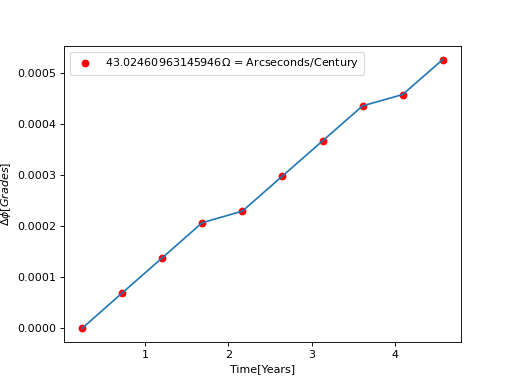

In [121]:
plt.plot(2*np.array(t)[0:], 2*(angulo[0:]-angulo[0]))
plt.scatter(2*np.array(t)[0:], 2*(angulo[0:]-angulo[0]), color = 'r', label = str(pendiente)+"$\Omega$ = Arcseconds/Century")
plt.xlabel('Time[Years]')
plt.ylabel('$\Delta \phi [Grades]$')
plt.legend()